# Let's read in our manually tracked Exp005 FRAP data and generate some plots

These files contain the data for single pixels

## TODO

- More consistent naming of measurements
- Better ROIs


In [1]:
from os import listdir

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize

In [21]:
#Define the folder containing your file of interest,
#Currently this is './' the current folder
Exp005_folder = "C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_FRAP_Exp005_FocusTracking/"

In [22]:
Exp005_files = listdir(Exp005_folder)
Exp005_files

['Results from EML4-ALKv1_Box_FRAP_03 in µm per sec.csv',
 'Results from EML4-ALKv1_Box_FRAP_04 in µm per sec.csv',
 'Results from EML4-ALKv1_Box_FRAP_05 in µm per sec.csv',
 'Results from EML4-ALKv1_Box_FRAP_06 in µm per sec.csv',
 'Results from EML4-ALKv1_Box_FRAP_07 in µm per sec.csv',
 'Results from EML4-ALKv1_Box_FRAP_08 in µm per sec.csv',
 'Results from EML4-ALKv1_Box_FRAP_09 in µm per sec.csv',
 'Results from EML4-ALKv3_Box_FRAP_02 in µm per sec.csv',
 'Results from EML4-ALKv3_Box_FRAP_03 in µm per sec.csv',
 'Results from EML4-ALKv3_Box_FRAP_05 in µm per sec.csv',
 'Results from EML4-ALKv3_Box_FRAP_07 in µm per sec.csv']

## Read in the data

In [58]:
df_list = list()

for n, file in enumerate(Exp005_files):
    
    path = Exp005_folder+file

    # We have to use the open function because the ImageJ manual tracker plugin gave headers with a degree symbol.
    with open(path, 'r', encoding='utf8', errors='ignore') as f:
        df = pd.read_csv(f, encoding='utf-8')
    
    # Let's clean up the header
    df.rename(columns={"Track n": "Track", "Slice n": "Slice"}, inplace=True)
    df.rename(columns={"Slice"  : "Frame"}, inplace=True)                      #Frame is a better name for timepoints
    
    # We can add the file name and a numeric index at this early stage.
    df.insert(0, 'File', n)    
    
    df_list.append(df)

In [59]:
df_list[1]

,File,Track,Frame,X,Y,Distance,Velocity,Pixel Value
0,1,1,1,241,236,-1.000,-1.000,942
1,1,1,2,242,234,0.288,0.144,165
2,1,1,3,241,234,0.129,0.065,181
3,1,1,4,242,234,0.129,0.065,185
4,1,1,5,243,234,0.129,0.065,181
...,...,...,...,...,...,...,...,...
398,1,3,117,216,264,0.785,0.392,592
399,1,3,118,214,261,0.465,0.233,562
400,1,3,119,213,257,0.532,0.266,203
401,1,3,120,213,257,0.000,0.000,199


## Pull out Individual Traces

In [60]:
# Concatenate dataframes from different files, and group by File and Track for plotting
combined_df = pd.concat(df_list, axis=0)
combined_df

,File,Track,Frame,X,Y,Distance,Velocity,Pixel Value
0,0,1,1,229,268,-1.000,-1.000,953
1,0,1,2,229,268,0.000,0.000,143
2,0,1,3,229,268,0.000,0.000,148
3,0,1,4,229,268,0.000,0.000,145
4,0,1,5,229,269,0.129,0.065,142
...,...,...,...,...,...,...,...,...
355,10,3,116,272,240,0.129,0.065,1612
356,10,3,117,272,240,0.000,0.000,1679
357,10,3,118,272,240,0.000,0.000,1626
358,10,3,119,272,240,0.000,0.000,1663


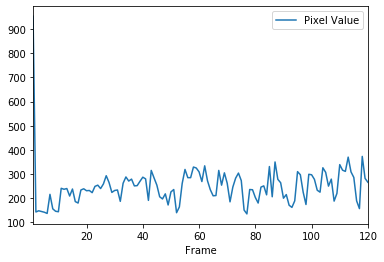

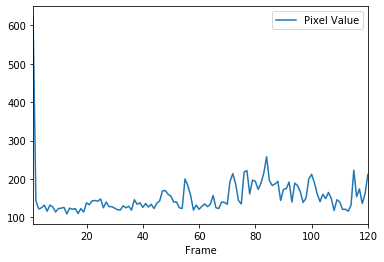

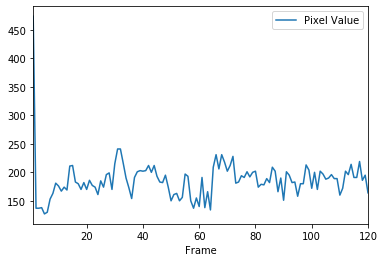

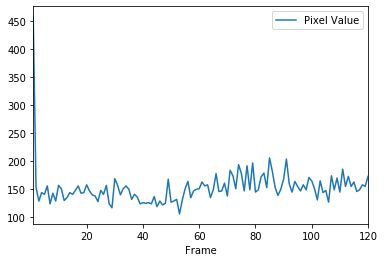

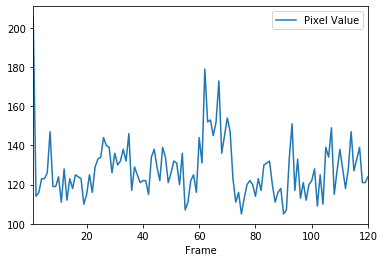

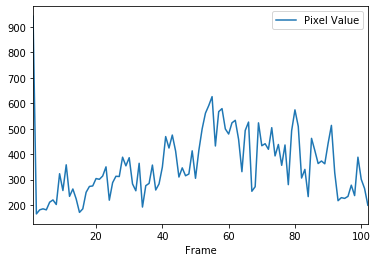

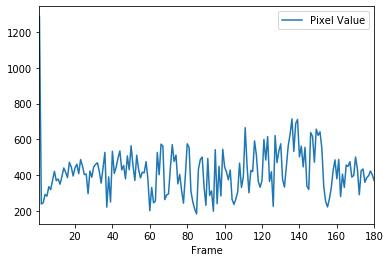

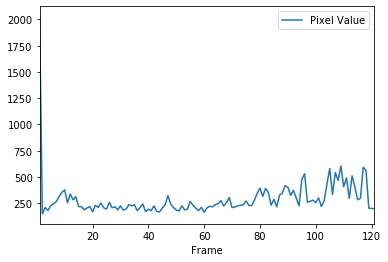

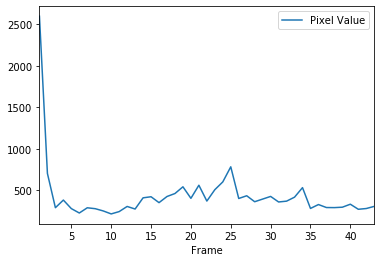

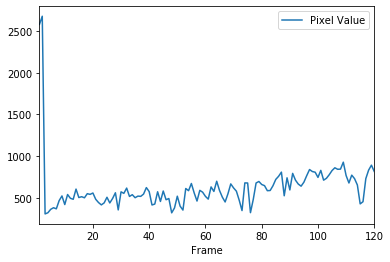

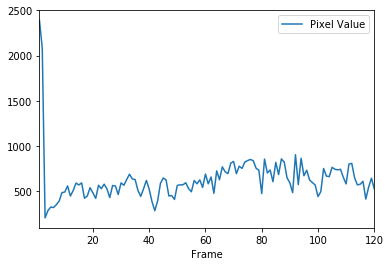

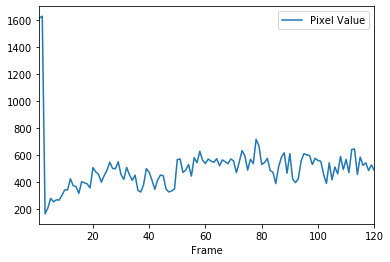

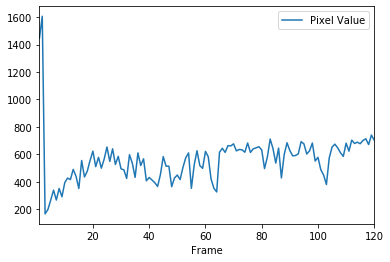

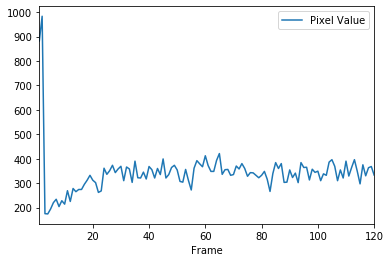

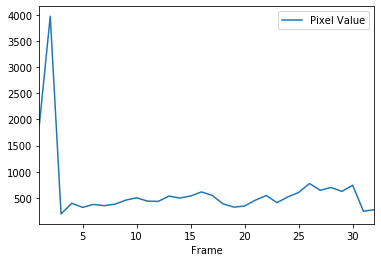

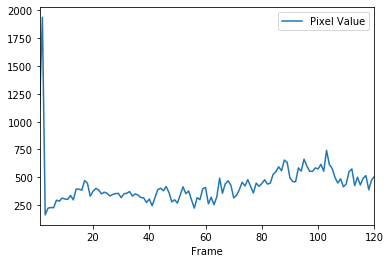

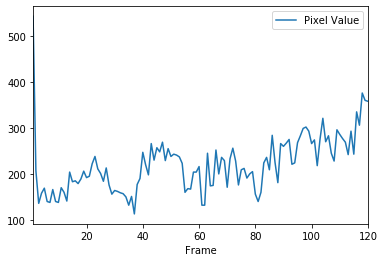

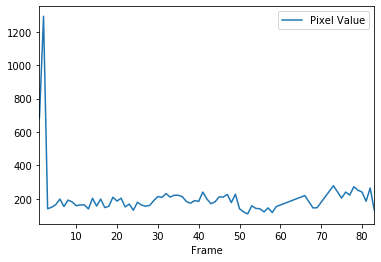

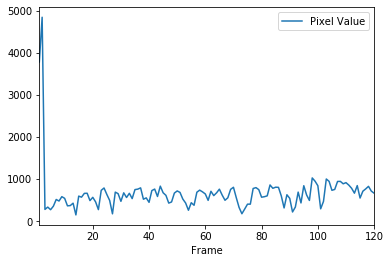

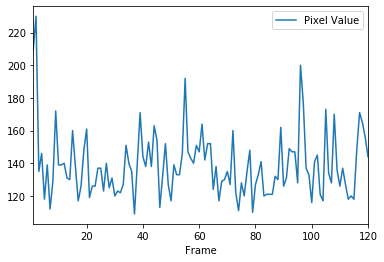

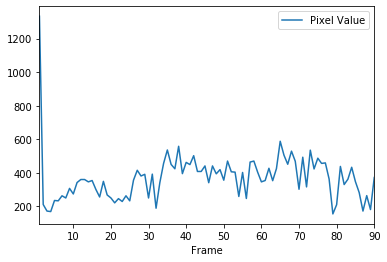

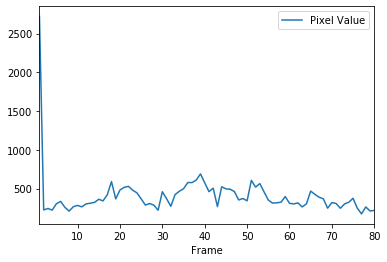

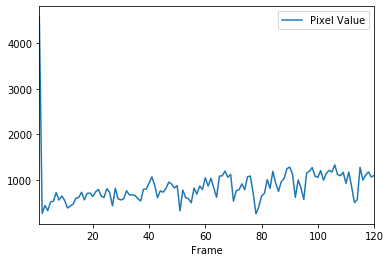

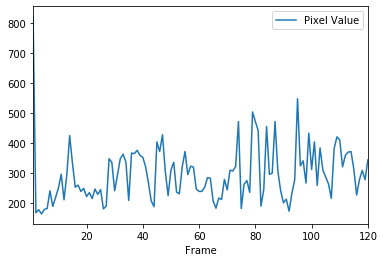

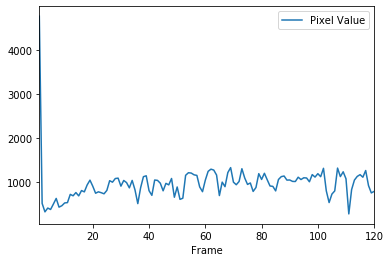

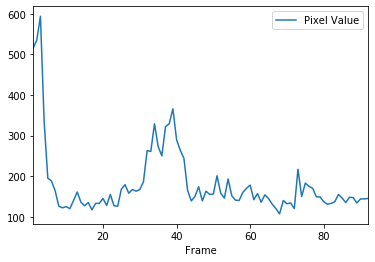

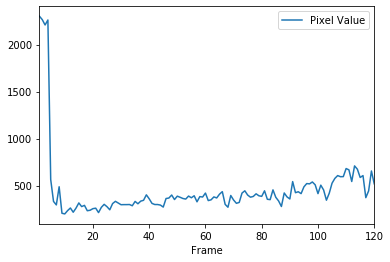

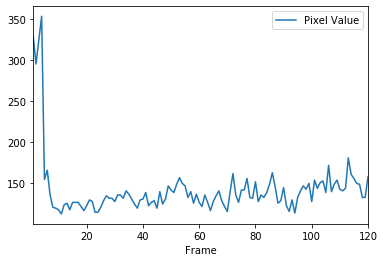

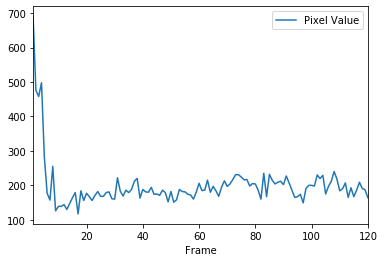

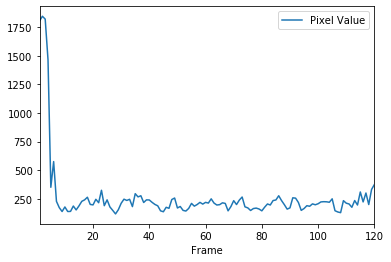

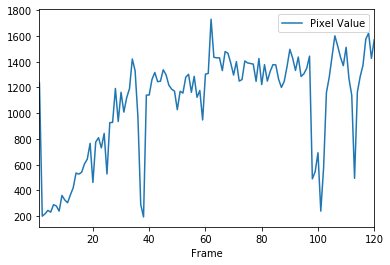

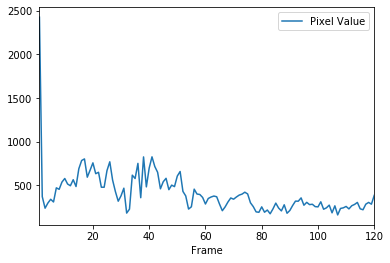

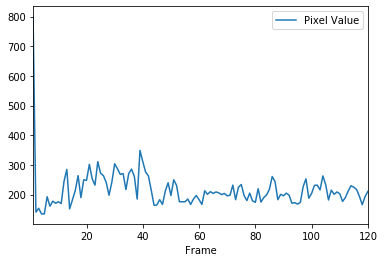

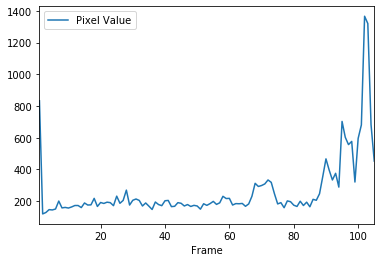

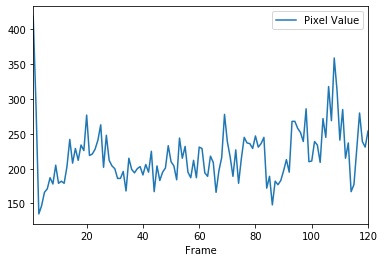

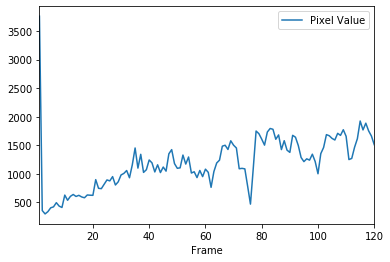

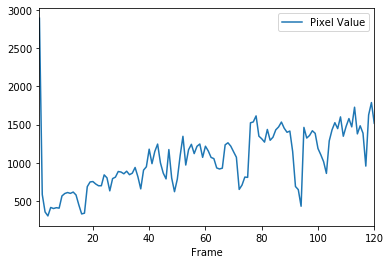

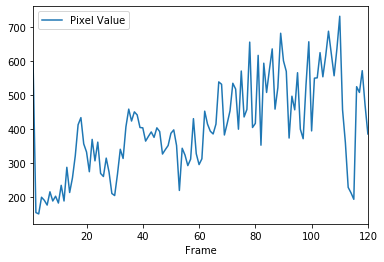

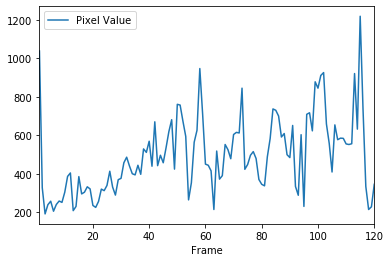

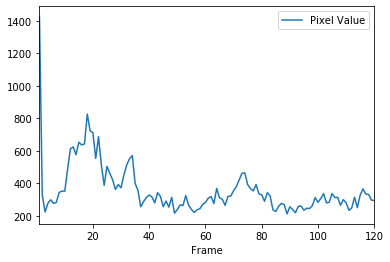

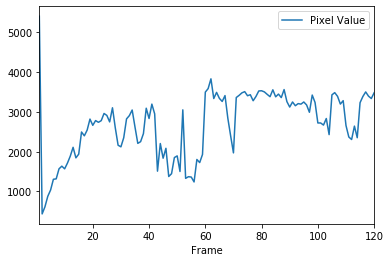

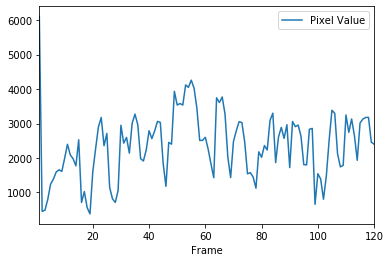

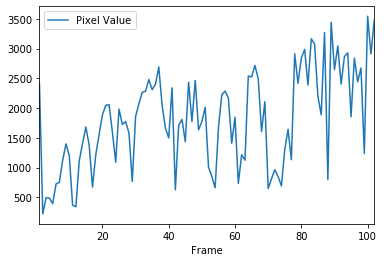

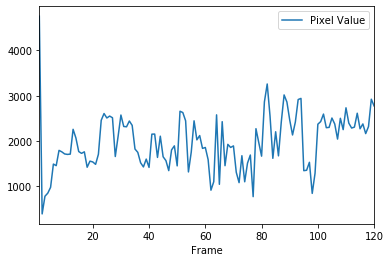

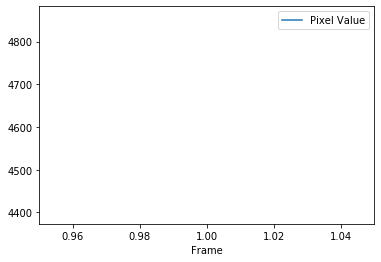

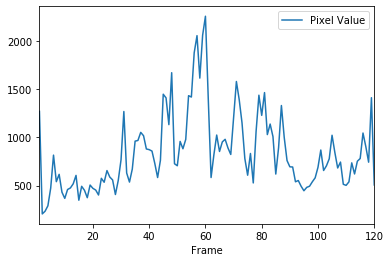

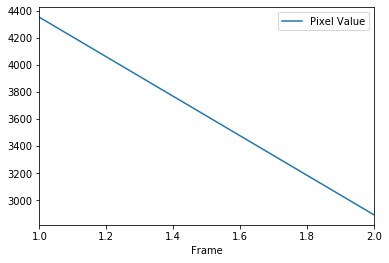

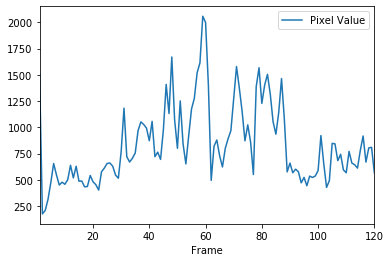

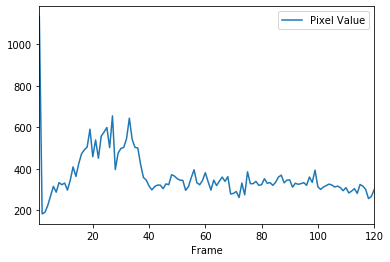

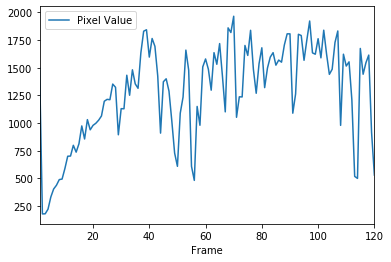

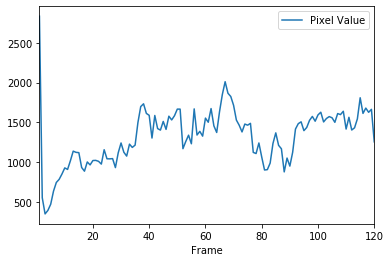

In [62]:
combined_df.groupby(by=['File', 'Track']).plot(x='Frame', y='Pixel Value');
# The single pixel measurements are too noisy and have no measurements to normalise to.

In [ ]:
# Can I plot the two proteins? files 0-6 are ALKv1

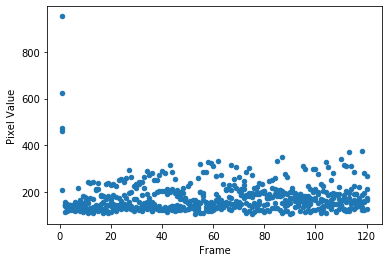

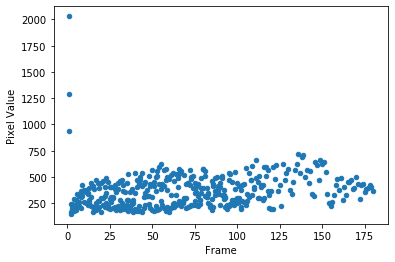

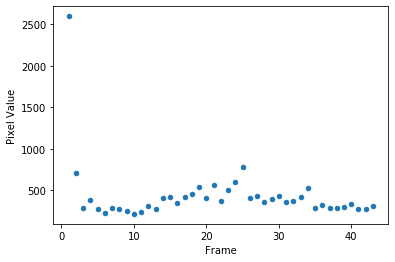

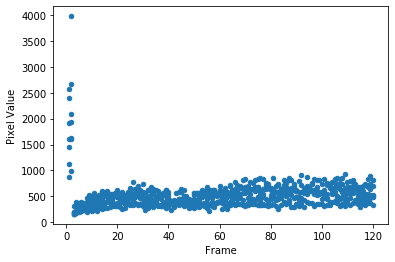

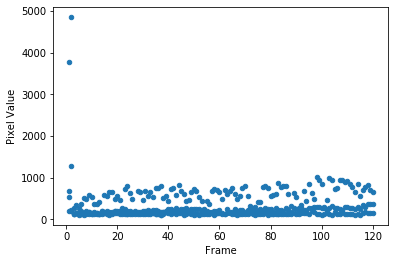

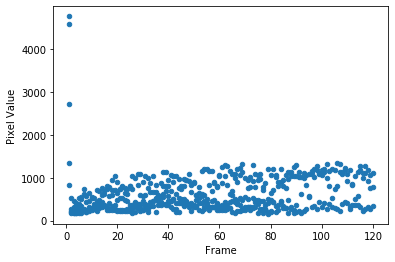

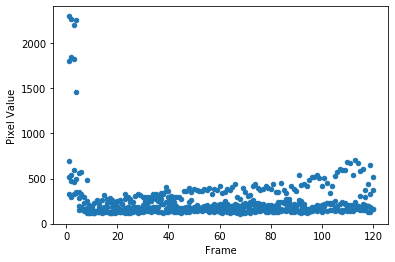

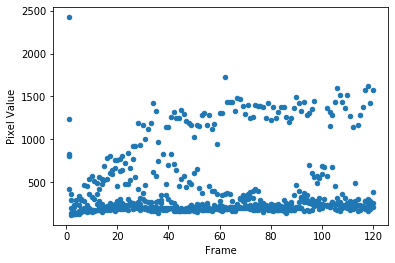

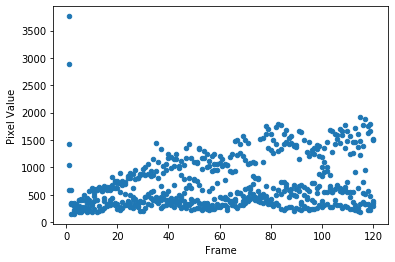

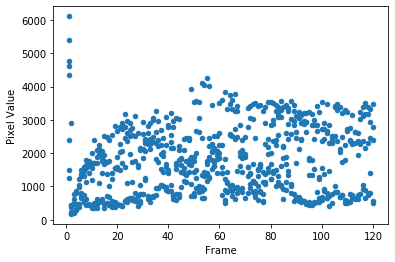

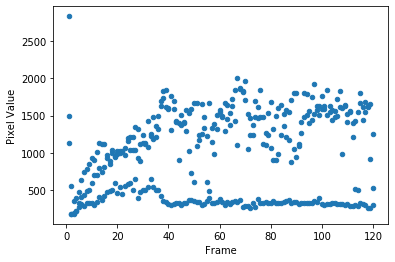

In [64]:
combined_df.groupby(by=['File']).plot(x='Frame', y='Pixel Value', kind='scatter');

In [ ]:
## So we need a script to generate ImageJ ROIs from coordinate lists and measure intensities.
## Probably this would just be easier in python, now we have the coordinate lists to work from.
## Perhaps the whole workflow would be easier in python

In [66]:
import cv2

ModuleNotFoundError: No module named 'cv2'